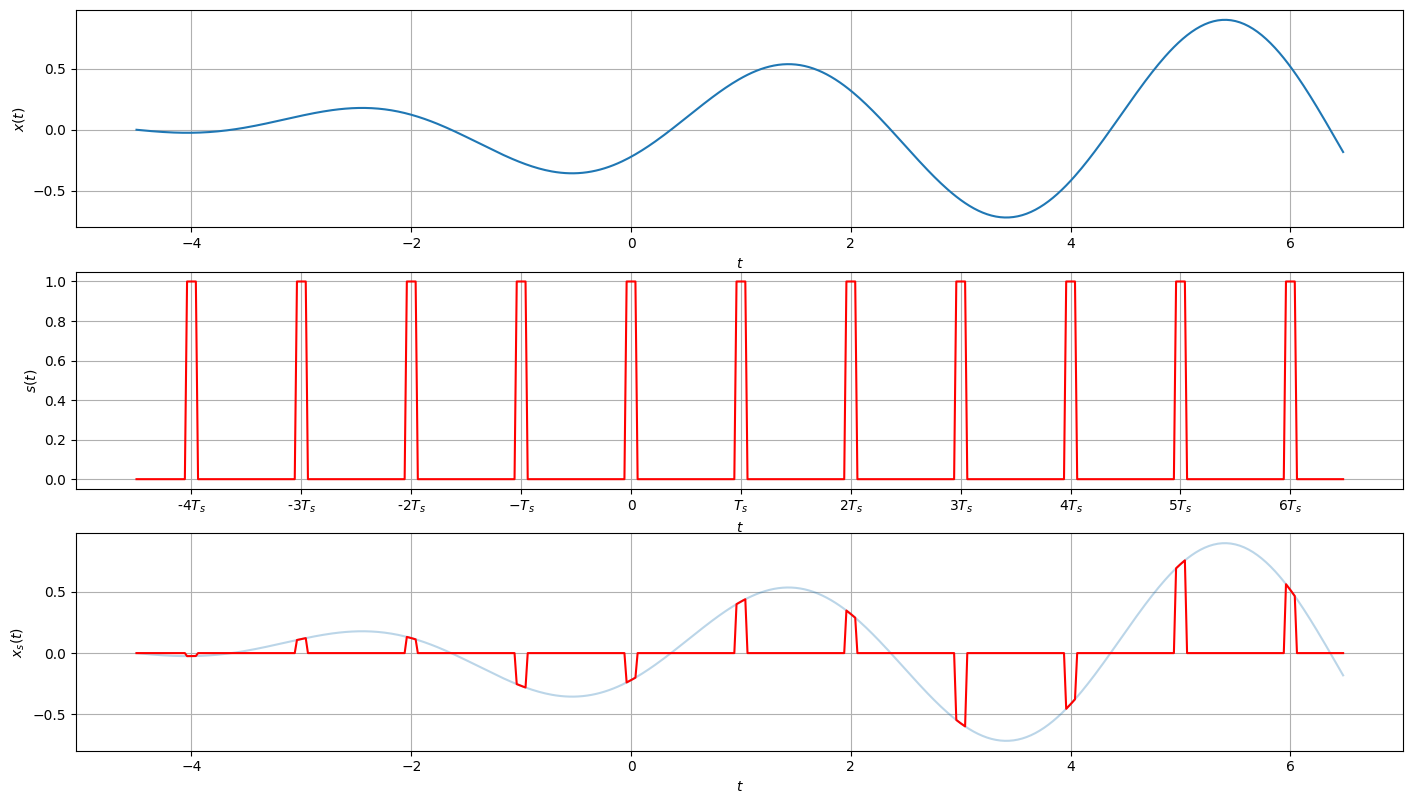

In [1]:
# ================= ISS: sampling
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz

# >>>>>>>>>>>>>>>>> #sampling_time <<<<<<<<<<<<<<<<<<<<<<<<<
Ts = 1
Tmin=-4.5
Tmax=6.5
index_zero = 4
where_in_time = np.arange(-4,6+1)
DELTA = 1/50
t = np.arange(Tmin,Tmax,DELTA)

# pekny vektor popisu ...
time_text = list()
for ii in where_in_time:
    time_text.append(str(int(ii)) + '$T_s$')
# fixing 0, 1 and -1 ...
time_text[index_zero] = '0'
time_text[index_zero+1] = '$T_s$'
time_text[index_zero-1] = '$-T_s$'

# some signal
x = -np.cos(1/2*np.pi * t + 1) * (t - Tmin) / (Tmax - Tmin)
fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')
ax[0].grid()

# sampling signal
s_rectangles = np.zeros(t.size)
theta = 1/10
for where in where_in_time:
    s_rectangles[(t > where-theta/2) & (t < where+theta/2)] = 1
ax[1].plot(t,s_rectangles,color='r')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$s(t)$')
ax[1].grid()
ax[1].set_xticks(where_in_time)
ax[1].set_xticklabels(time_text)

# sampled signal
xs = x * s_rectangles
ax[2].plot(t,x,alpha=0.3)
ax[2].plot(t,xs,color='r')
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$x_s(t)$')
ax[1].set_xticks(where_in_time)
ax[1].set_xticklabels(time_text)
ax[2].grid()

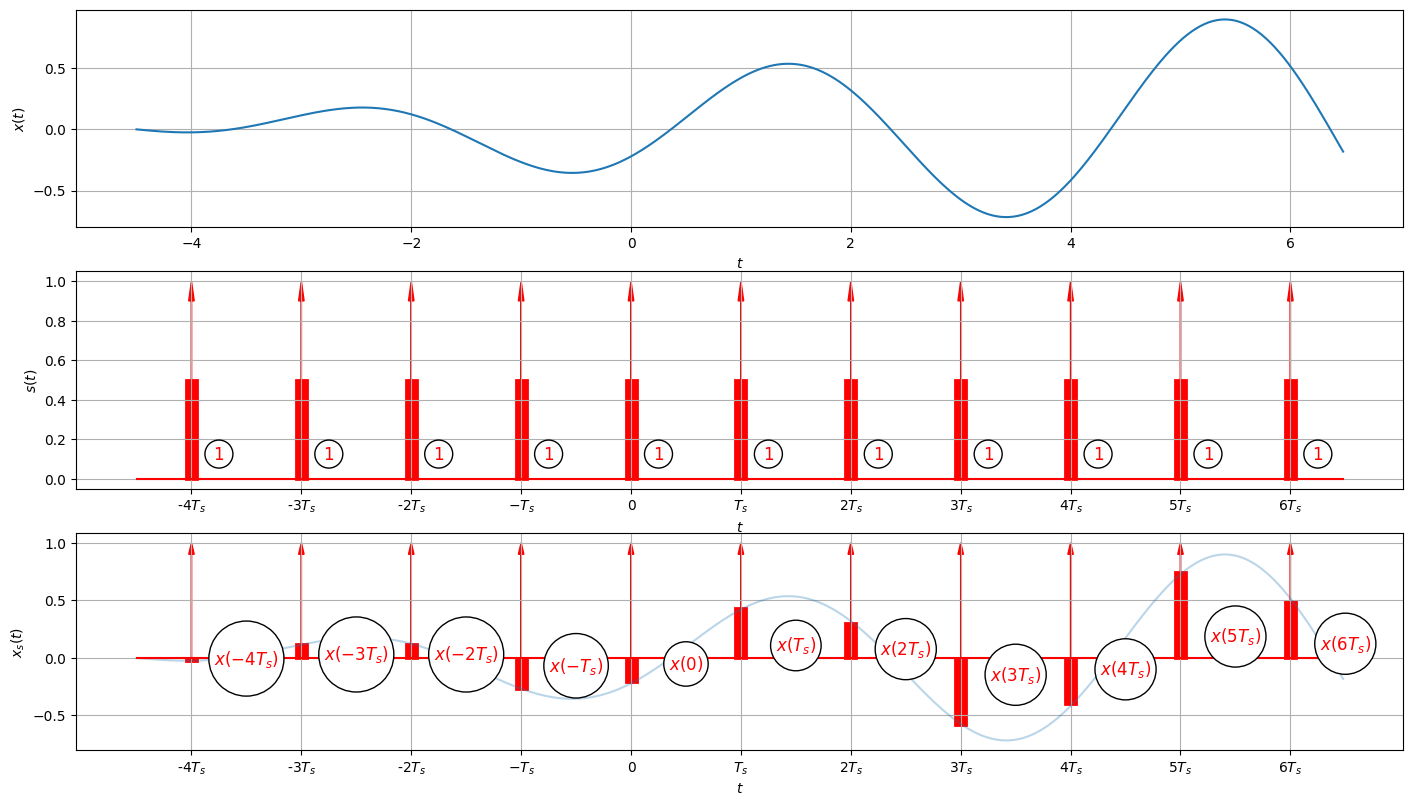

In [2]:
# the same with Diracs ...

def draw_Dirac(t,width,height,heightarrow,mighteness,t_mighteness,fig):
    # different from the previous function, everything parametrizable ...
    tfrom = t-width/2
    tto = t+width/2
    fig.arrow(t, 0, 0,heightarrow, head_width=0.05*heightarrow, head_length=0.1*heightarrow, length_includes_head=True, fc='red', ec='red')
    fig.fill([tfrom, tto, tto, tfrom],[0, 0, height, height],color='r',fill=True,linewidth =2)
    #[ymin,ymax]=fig.get_ylim()
    #fig.set_ylim(ymin,1.1*x0)
    fig.text(t_mighteness, height/4, mighteness, size=12,ha="center", va="center",
             bbox=dict(boxstyle="circle",fc='white'), color='red')

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(t,x)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')
ax[0].grid()

# sampling signal - Diracs
s = np.zeros(t.size)
theta = 1/10
ax[1].plot(t,s,color='r')
for where in where_in_time:
    draw_Dirac(where,theta,0.5,1,'1',where+Ts/4,ax[1])
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$s(t)$')
ax[1].grid()
ax[1].set_xticks(where_in_time)
ax[1].set_xticklabels(time_text)

# nice vector of mightenesses for Diracs
dirac_text = list()
for ii in where_in_time:
    dirac_text.append(r'$x(' + str(int(ii)) + r'T_s)$')
# fixing 0, 1 and -1 ...
dirac_text[index_zero] = '$x(0)$'
dirac_text[index_zero+1] = '$x(T_s)$'
dirac_text[index_zero-1] = '$x(-T_s)$'

# sampled signal - Diracs
s = np.zeros(t.size)
theta = 1/10
ax[2].plot(t,x,alpha=0.3)
ax[2].plot(t,s,color='r')
for where,mighteness in zip(where_in_time,dirac_text):
    thisxs = x[np.searchsorted(t,where)]
    draw_Dirac(where,theta,thisxs,1,mighteness,where+Ts/2,ax[2])
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$x_s(t)$')
ax[2].set_xticks(where_in_time)
ax[2].set_xticklabels(time_text)
ax[2].grid()


Text(0, 0.5, '$X(j\\omega)$')

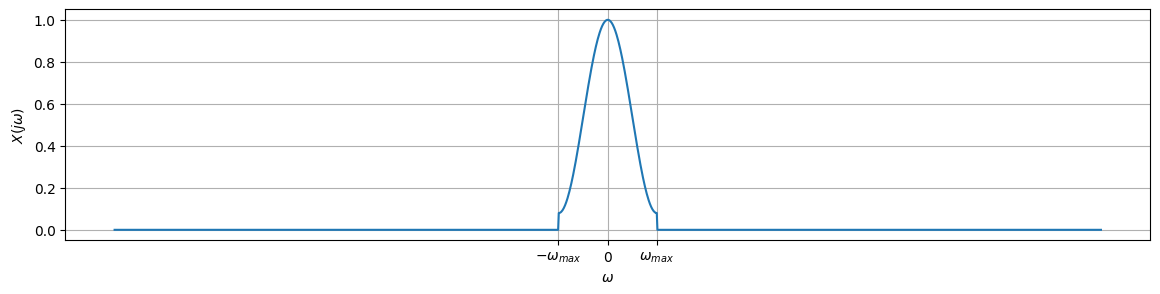

In [3]:
# >>>>>>>>>>>>>>>>> #spectrum_orig <<<<<<<<<<<<<<<<<<<<<<<<<
Oms = 2 * np.pi   # this is just for simplicity ... must correspond to Ts !
ODELTA = 1/50
omgener = np.arange(-4 * Oms, 4*Oms, ODELTA)   # for generating
multiples_Om_show = np.arange(-2,2+1)
index_omzero_show = 2
indices_show = np.argwhere((omgener > -2.5*Oms) & (omgener < 2.5*Oms)).flatten()  # for showing
omshow = omgener[indices_show]

# one spectrum
ommax = 0.25 * Oms
indices_add = np.argwhere((omgener > -ommax) & (omgener < ommax)).flatten()
HAM = np.hamming(indices_add.size)
X = np.zeros(omgener.shape)
X[indices_add] = HAM

plt.figure(figsize=(14,3))
plt.plot(omshow, X[indices_show])
plt.gca().grid()
plt.gca().set_xticks([-ommax,0,ommax])
plt.gca().set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
plt.gca().set_xlabel('$\omega$')
plt.gca().set_ylabel('$X(j\omega)$')


Text(137.72222222222223, 0.5, '$S(j\\omega)$')

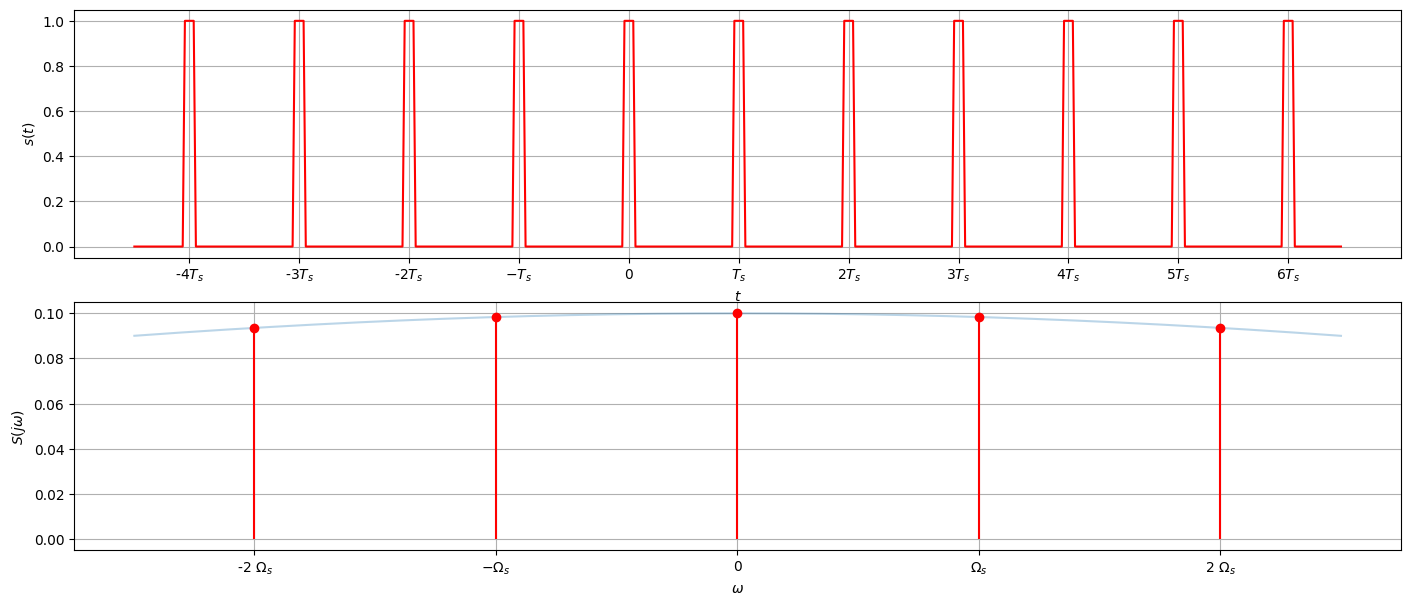

In [19]:
# >>>>>>>>>>>>>>>>> #ck_rectangles <<<<<<<<<<<<<<<<<<<<<<<<<
fig, ax = plt.subplots(2,1,figsize=(14,6))
fig.tight_layout()
s_rectangles = np.zeros(t.size)
theta = 1/10    #<-------------------- set theta here !  try 1/10 and 1/2
for where in where_in_time:
    s_rectangles[(t > where-theta/2) & (t < where+theta/2)] = 1
ax[0].plot(t,s_rectangles,color='r')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$s(t)$')
ax[0].grid()
ax[0].set_xticks(where_in_time)
ax[0].set_xticklabels(time_text)

# nice vector of multiples of Omegas for freqs.
where_in_omega = list()
omegas_text = list()
for ii in multiples_Om_show:
    omegas_text.append(str(int(ii)) + r'$~\Omega_s$')
    where_in_omega.append(ii * Oms)
# fixing 0, 1 and -1 ...
omegas_text[index_omzero_show] = '0'
omegas_text[index_omzero_show+1] = r'$\Omega_s$'
omegas_text[index_omzero_show-1] = r'$-\Omega_s$'

# spectrum incl the aux. function
mysinc = 1 * theta / Ts * np.sinc(theta/2 * omgener / np.pi)
ck = 1 * theta / Ts * np.sinc(theta/2 * multiples_Om_show * Oms / np.pi)
ax[1].plot(omshow, mysinc[indices_show],alpha=0.3)
ax[1].stem(multiples_Om_show * Oms, ck,basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')


[Text(0, 0, '0'), Text(0, 1, '$1/T_s$')]

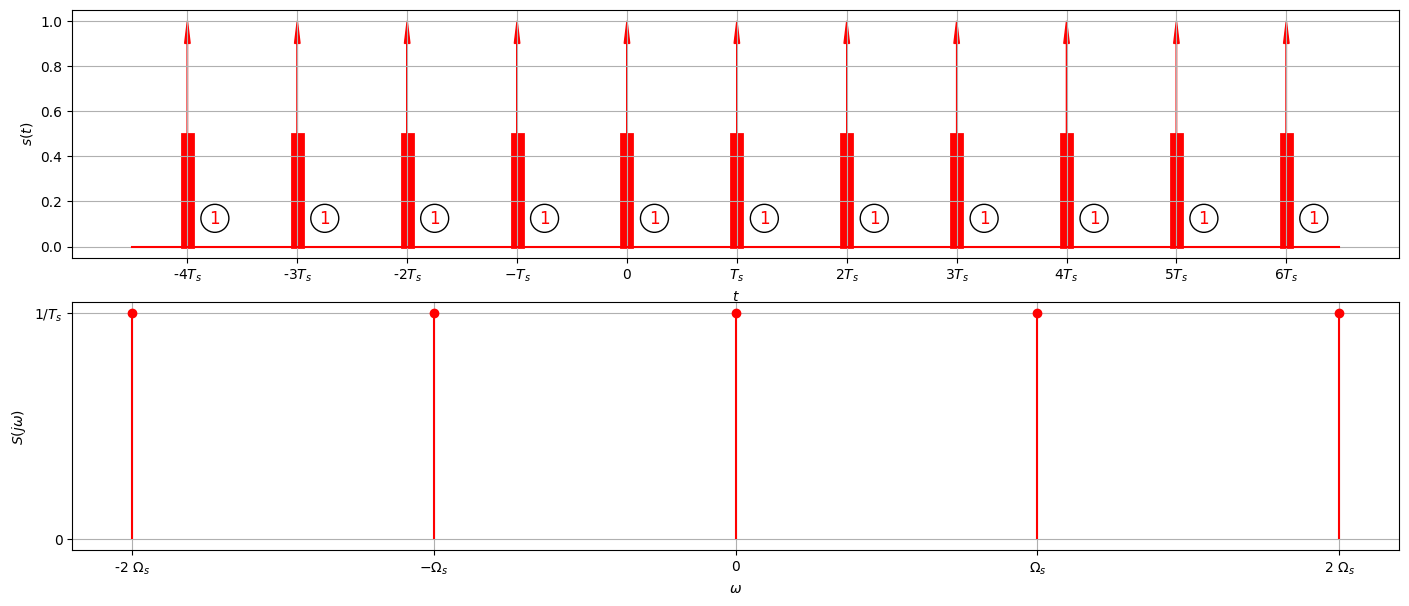

In [5]:
# >>>>>>>>>>>>>>>>> #ck_Diracs <<<<<<<<<<<<<<<<<<<<<<<<<
fig, ax = plt.subplots(2,1,figsize=(14,6))
fig.tight_layout()
# sampling signal - Diracs
s = np.zeros(t.size)
ax[0].plot(t,s,color='r')
for where in where_in_time:
    draw_Dirac(where,0.1,0.5,1,'1',where+Ts/4,ax[0])
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$s(t)$')
ax[0].grid()
ax[0].set_xticks(where_in_time)
ax[0].set_xticklabels(time_text)

# cks of DIracs
ck = 1 / Ts * np.sinc(0 * multiples_Om_show * Oms / np.pi)
ax[1].stem(multiples_Om_show * Oms, ck,basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')
ax[1].set_yticks([0,1])
ax[1].set_yticklabels(['0','$1/T_s$'])


[Text(0, 0.0, '0'), Text(0, 6.283185307179586, '$2\\pi / T_s$')]

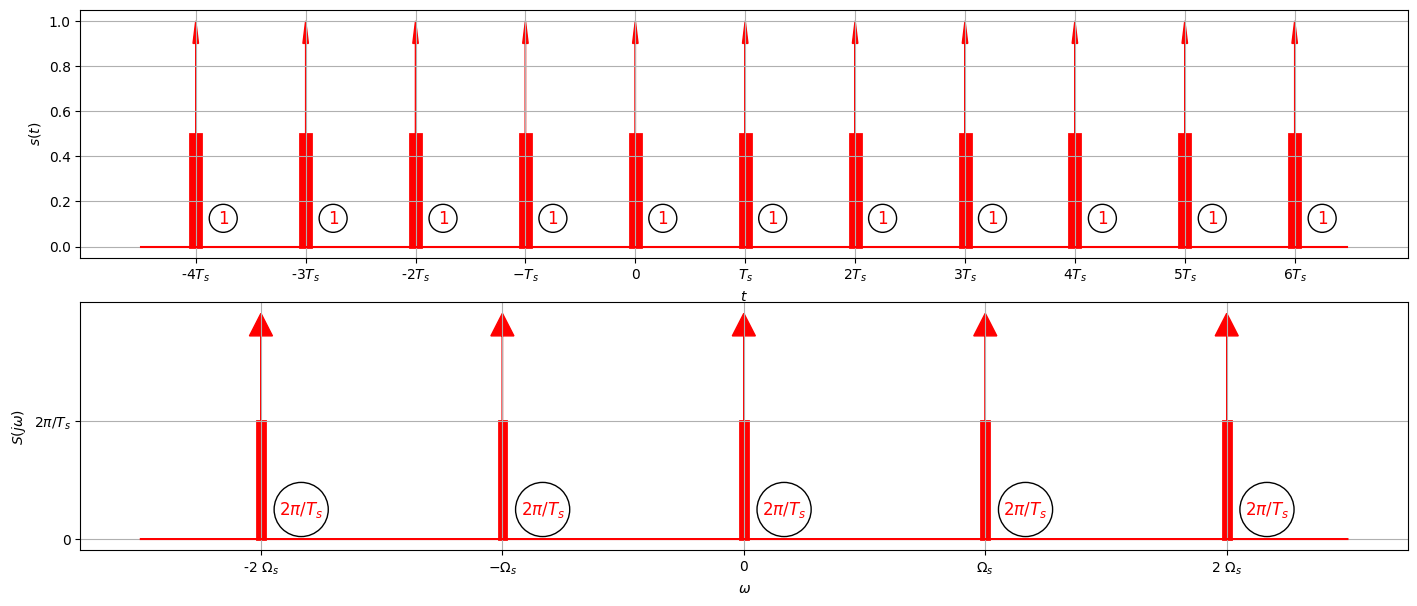

In [6]:
# >>>>>>>>>>>>>>>>> #spectrum_Diracs <<<<<<<<<<<<<<<<<<<<<<<<<
fig, ax = plt.subplots(2,1,figsize=(14,6))
fig.tight_layout()
# sampling signal - Diracs
s = np.zeros(t.size)
ax[0].plot(t,s,color='r')
for where in where_in_time:
    draw_Dirac(where,0.1,0.5,1,'1',where+Ts/4,ax[0])
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$s(t)$')
ax[0].grid()
ax[0].set_xticks(where_in_time)
ax[0].set_xticklabels(time_text)

# spec. function of DIracs
S = np.zeros(omgener.shape)
ax[1].plot(omshow, S[indices_show],color='r')
for where in multiples_Om_show * Oms:
    draw_Dirac(where,0.2,2*np.pi,12,'$2\pi/T_s$',where+Oms/6,ax[1])
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')
ax[1].set_yticks([0,2*np.pi])
ax[1].set_yticklabels(['0','$2\pi / T_s$'])


[Text(0, 0.0, '0'), Text(0, 1.0, '$F_s max(X(j\\omega))$')]

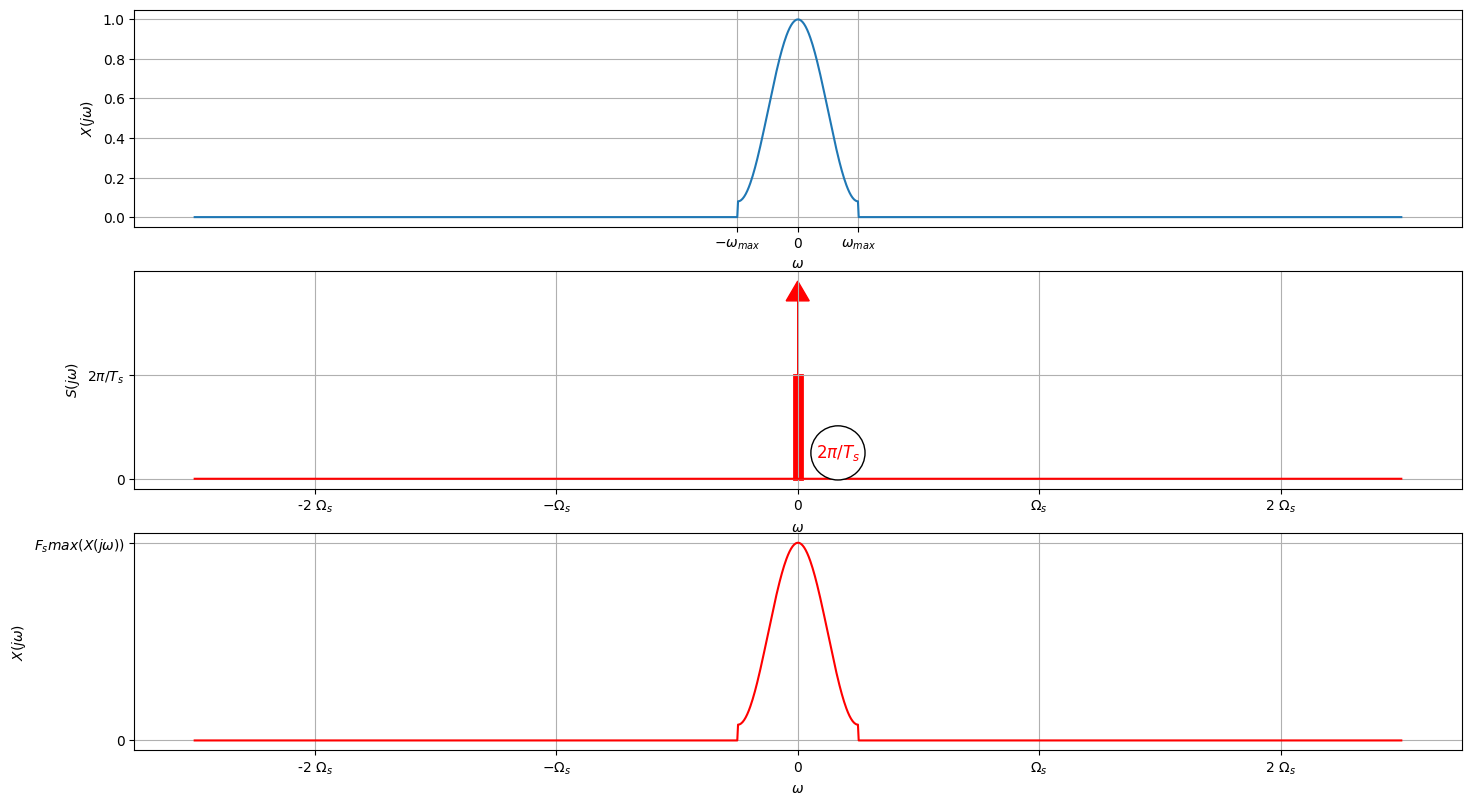

In [7]:
# >>>>>>>>>>>>>>>>> #spectrum_sampled <<<<<<<<<<<<<<<<<<<<<<<<<
ommax = 0.25 * Oms
indices_add = np.argwhere((omgener > -ommax) & (omgener < ommax)).flatten()
HAM = np.hamming(indices_add.size)
X = np.zeros(omgener.shape)
X[indices_add] = HAM

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show])
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

# 1 Dirac
S = np.zeros(omgener.shape)
ax[1].plot(omshow, S[indices_show],color='r')
where=0
draw_Dirac(where,0.2,2*np.pi,12,'$2\pi/T_s$',where+Oms/6,ax[1])
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')
ax[1].set_yticks([0,2*np.pi])
ax[1].set_yticklabels(['0','$2\pi / T_s$'])

XS = X / Ts
ax[2].plot(omshow, XS[indices_show],color='r')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$X(j\omega)$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].set_yticks([0,1/Ts])
ax[2].set_yticklabels(['0','$F_s max(X(j\omega))$'])

[Text(0, 0.0, '0'), Text(0, 1.0, '$F_s max(X(j\\omega))$')]

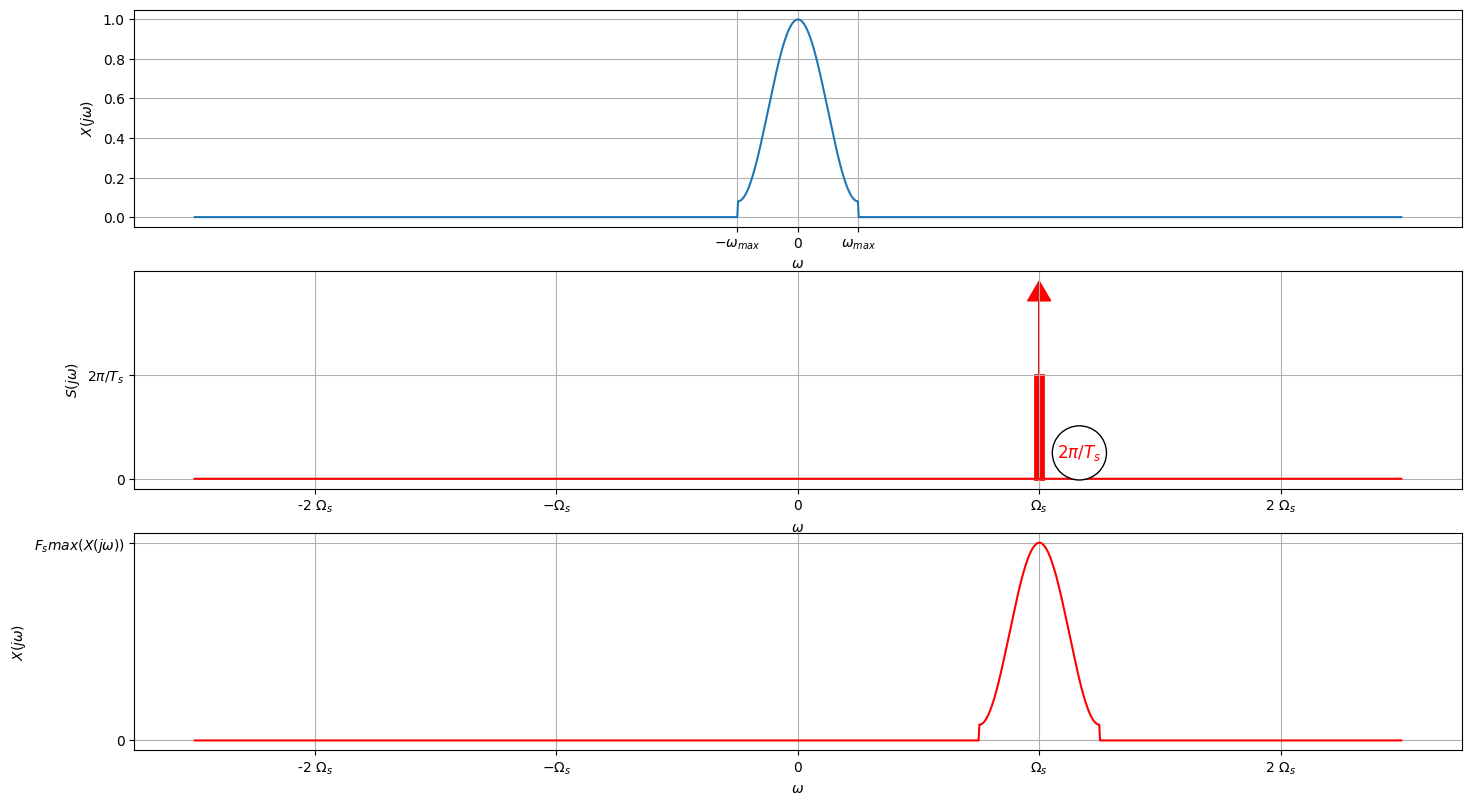

In [8]:
fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show])
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

# 1 shifted Dirac
S = np.zeros(omgener.shape)
ax[1].plot(omshow, S[indices_show],color='r')
where=Oms
draw_Dirac(where,0.2,2*np.pi,12,'$2\pi/T_s$',where+Oms/6,ax[1])
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')
ax[1].set_yticks([0,2*np.pi])
ax[1].set_yticklabels(['0','$2\pi / T_s$'])

XS = np.zeros(omgener.shape)
indices_add = np.argwhere((omgener > -ommax+Oms) & (omgener < ommax+Oms)).flatten()
HAM = np.hamming(indices_add.size)
XS[indices_add] = HAM / Ts
ax[2].plot(omshow, XS[indices_show],color='r')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$X(j\omega)$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].set_yticks([0,1/Ts])
ax[2].set_yticklabels(['0','$F_s max(X(j\omega))$'])

[Text(0, 0.0, '0'), Text(0, 1.0, '$F_s max(X(j\\omega))$')]

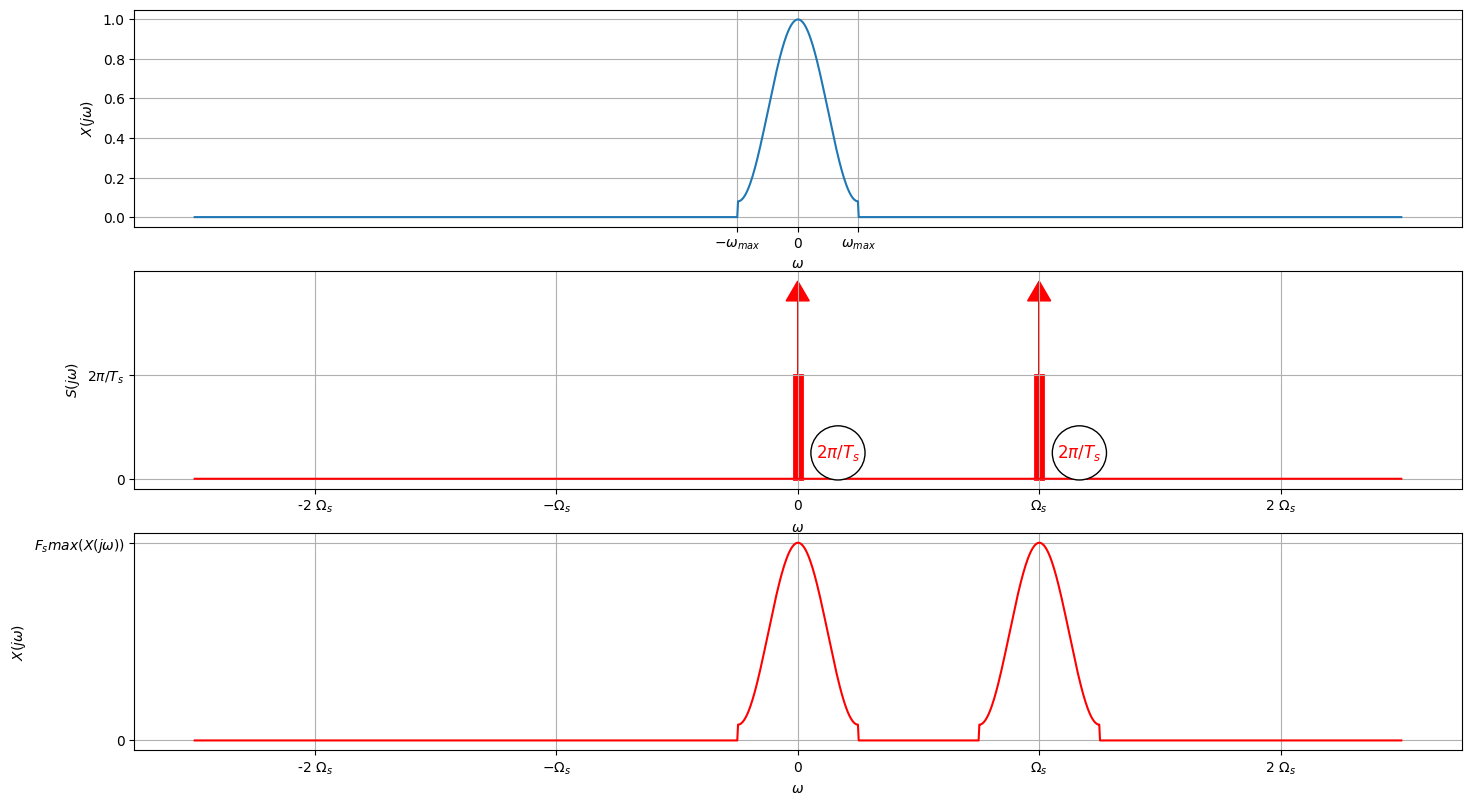

In [9]:
fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show])
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

# 2 shifted Diracs
S = np.zeros(omgener.shape)
ax[1].plot(omshow, S[indices_show],color='r')
for where in [0,Oms]:
    draw_Dirac(where,0.2,2*np.pi,12,'$2\pi/T_s$',where+Oms/6,ax[1])
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')
ax[1].set_yticks([0,2*np.pi])
ax[1].set_yticklabels(['0','$2\pi / T_s$'])

XS = np.zeros(omgener.shape)
for where in [0,Oms]:
    indices_add = np.argwhere((omgener > -ommax+where) & (omgener < ommax+where)).flatten()
    HAM = np.hamming(indices_add.size)
    XS[indices_add] = XS[indices_add] + HAM / Ts
ax[2].plot(omshow, XS[indices_show],color='r')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$X(j\omega)$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].set_yticks([0,1/Ts])
ax[2].set_yticklabels(['0','$F_s max(X(j\omega))$'])

[Text(0, 0.0, '0'), Text(0, 1.0, '$F_s max(X(j\\omega))$')]

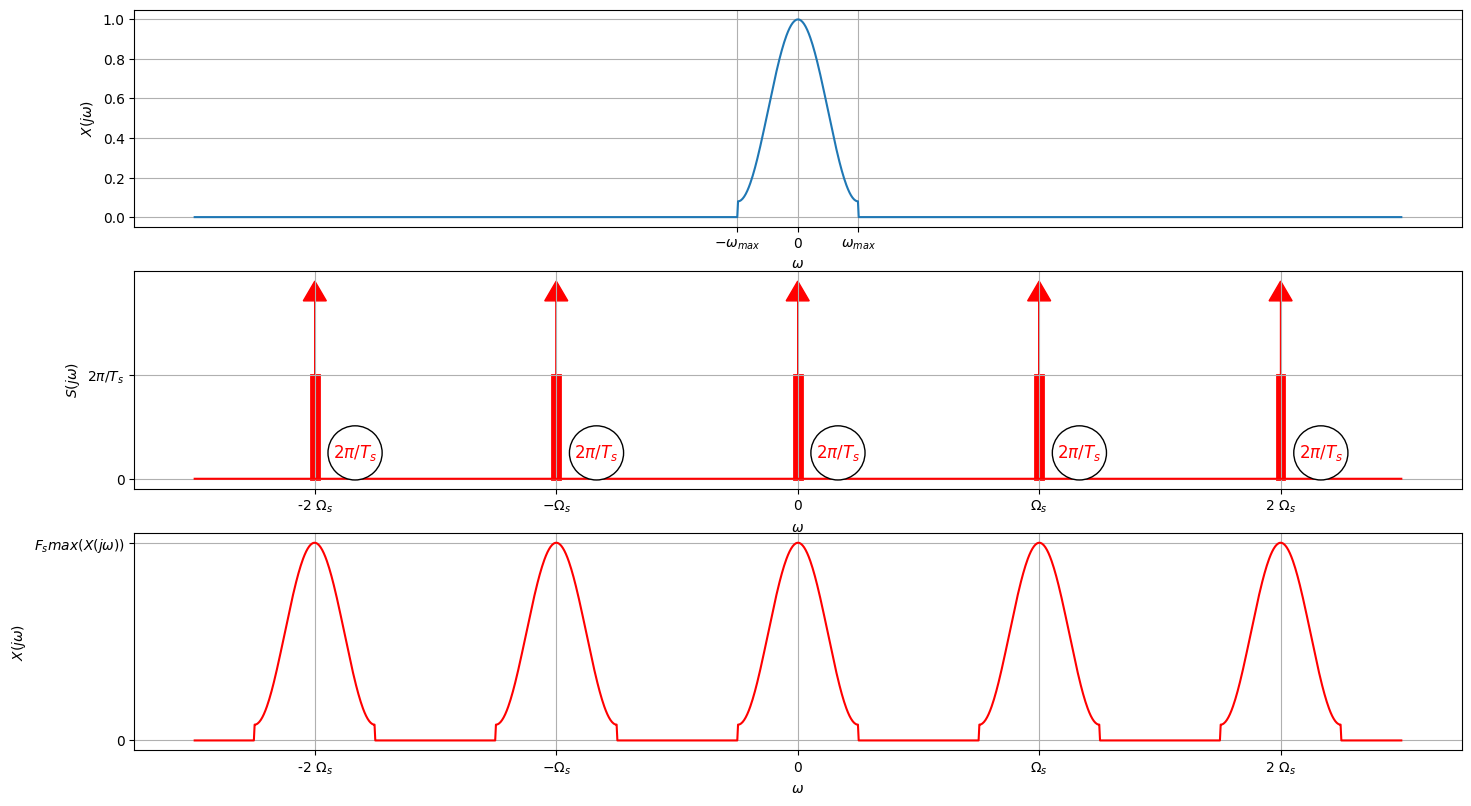

In [10]:
fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show])
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

# all shifted Diracs
multiples_Om_add = np.arange(-3,3+1)
S = np.zeros(omgener.shape)
ax[1].plot(omshow, S[indices_show],color='r')
for where in multiples_Om_show * Oms:         # here only show !
    draw_Dirac(where,0.2,2*np.pi,12,'$2\pi/T_s$',where+Oms/6,ax[1])
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')
ax[1].set_yticks([0,2*np.pi])
ax[1].set_yticklabels(['0','$2\pi / T_s$'])

XS = np.zeros(omgener.shape)
for where in multiples_Om_add * Oms:
    indices_add = np.argwhere((omgener > -ommax+where) & (omgener < ommax+where)).flatten()
    HAM = np.hamming(indices_add.size)
    XS[indices_add] = XS[indices_add] + HAM / Ts
ax[2].plot(omshow, XS[indices_show],color='r')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$X(j\omega)$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].set_yticks([0,1/Ts])
ax[2].set_yticklabels(['0','$F_s max(X(j\omega))$'])

[Text(0, 0.0, '0'), Text(0, 1.0, '$F_s max(X(j\\omega))$')]

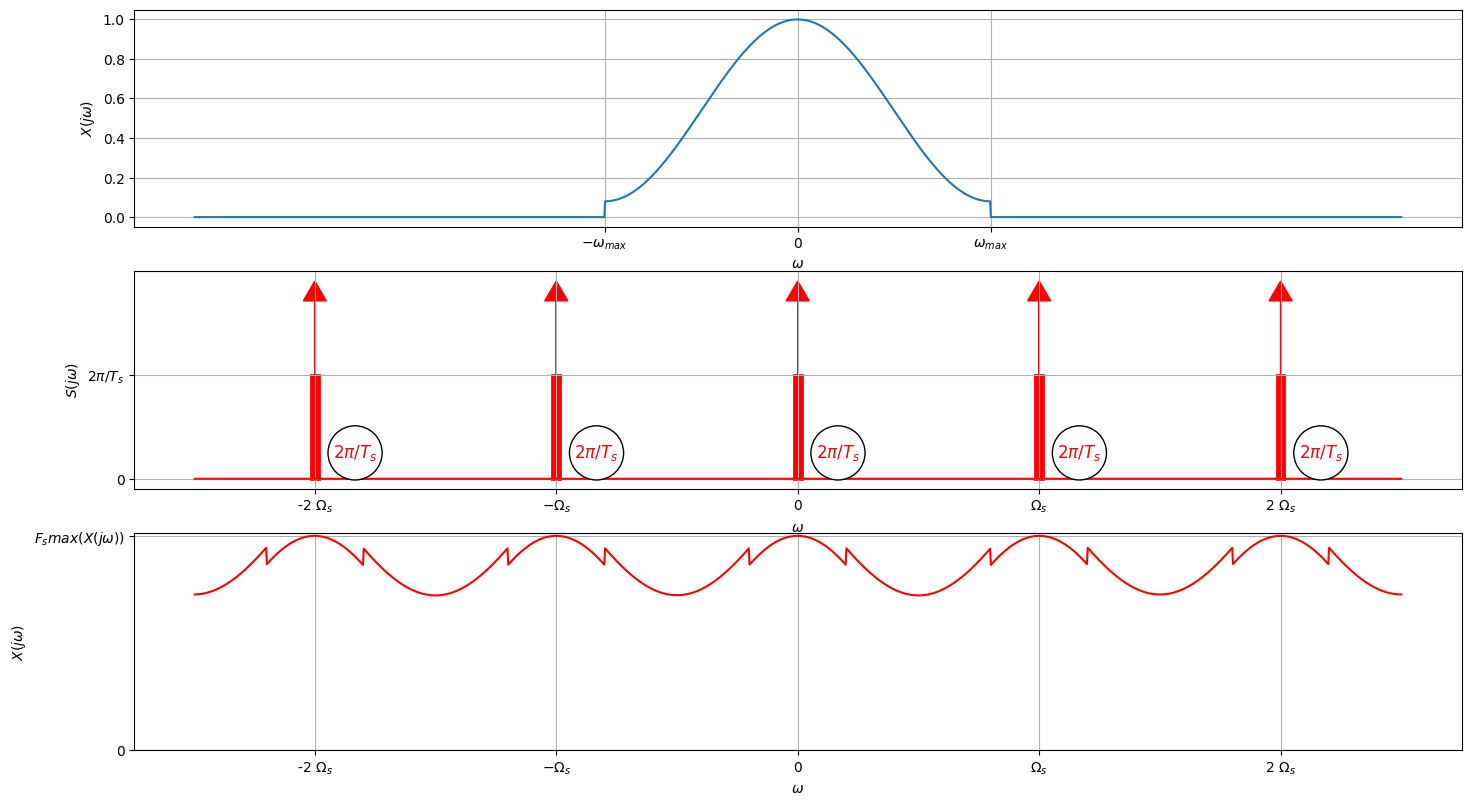

In [11]:
# >>>>>>>>>>>>>>>>> #aliasing <<<<<<<<<<<<<<<<<<<<<<<<<
ommax = 0.8 * Oms
indices_add = np.argwhere((omgener > -ommax) & (omgener < ommax)).flatten()
HAM = np.hamming(indices_add.size)
X = np.zeros(omgener.shape)
X[indices_add] = HAM

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show])
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

# all shifted Diracs
multiples_Om_add = np.arange(-3,3+1)
S = np.zeros(omgener.shape)
ax[1].plot(omshow, S[indices_show],color='r')
for where in multiples_Om_show * Oms:         # here only show !
    draw_Dirac(where,0.2,2*np.pi,12,'$2\pi/T_s$',where+Oms/6,ax[1])
ax[1].grid()
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$S(j\omega)$')
ax[1].set_yticks([0,2*np.pi])
ax[1].set_yticklabels(['0','$2\pi / T_s$'])

XS = np.zeros(omgener.shape)
for where in multiples_Om_add * Oms:
    indices_add = np.argwhere((omgener > -ommax+where) & (omgener < ommax+where)).flatten()
    HAM = np.hamming(indices_add.size)
    XS[indices_add] = XS[indices_add] + HAM / Ts
ax[2].plot(omshow, XS[indices_show],color='r')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$X(j\omega)$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].set_yticks([0,1/Ts])
ax[2].set_yticklabels(['0','$F_s max(X(j\omega))$'])

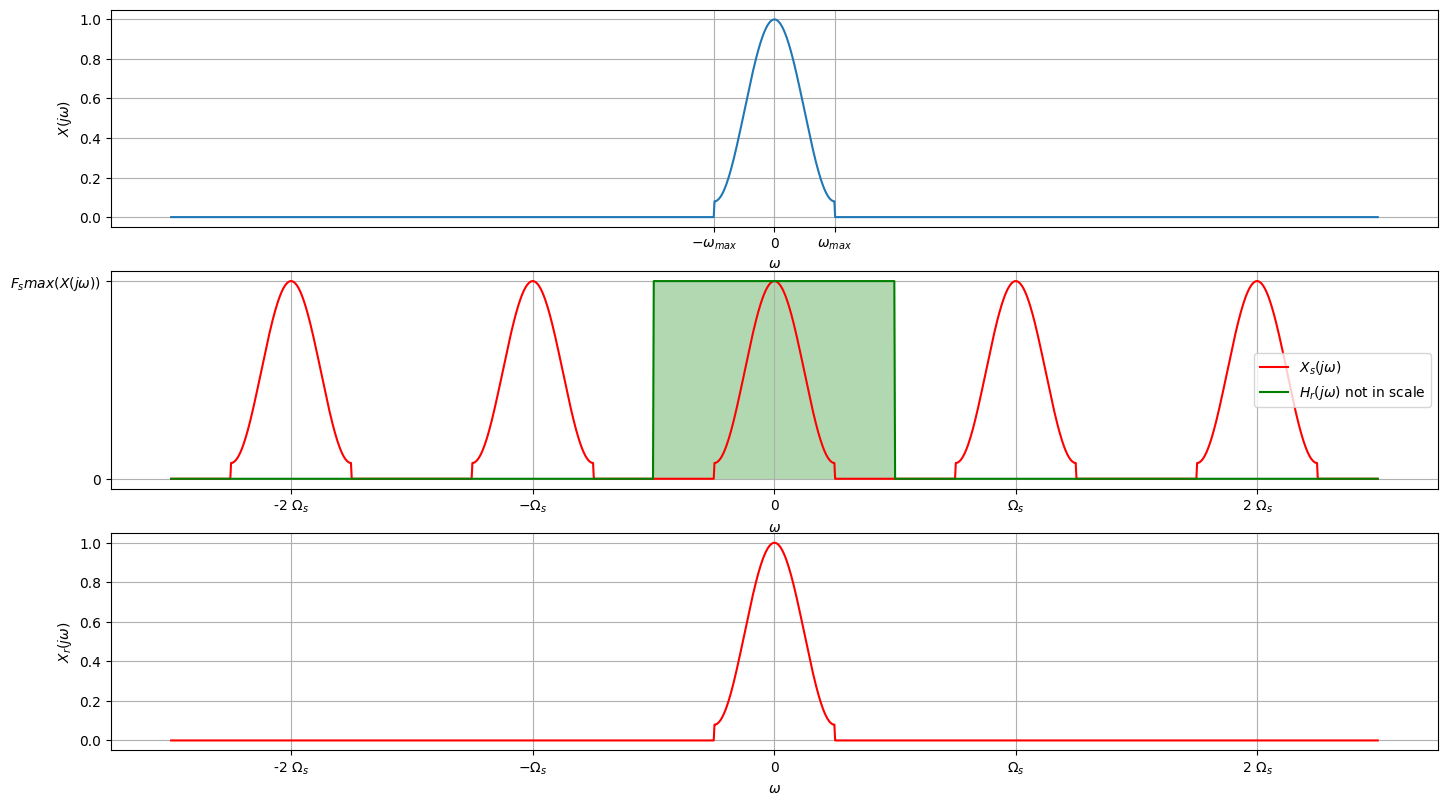

In [12]:
# >>>>>>>>>>>>>>>>> #reconstruction_spectrum_ok <<<<<<<<<<<<<<<<<<<<<<<<<
ommax = 0.25 * Oms
indices_add = np.argwhere((omgener > -ommax) & (omgener < ommax)).flatten()
HAM = np.hamming(indices_add.size)
X = np.zeros(omgener.shape)
X[indices_add] = HAM

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show])
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

XS = np.zeros(omgener.shape)
for where in multiples_Om_add * Oms:
    indices_add = np.argwhere((omgener > -ommax+where) & (omgener < ommax+where)).flatten()
    HAM = np.hamming(indices_add.size)
    XS[indices_add] = XS[indices_add] + HAM / Ts
HR = np.zeros(omgener.shape)
HR[(omgener > -Oms/2) & (omgener < +Oms/2)] = Ts

ax[1].plot(omshow, XS[indices_show],color='r',label='$X_s(j\omega)$')
ax[1].plot(omshow, HR[indices_show] / Ts ** 2,color='g',label='$H_r(j\omega)$ not in scale')
ax[1].fill([-Oms/2, Oms/2, Oms/2, -Oms/2],[0, 0, 1/Ts, 1/Ts],color='g',fill=True,linewidth =0,alpha=0.3)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_yticks([0,1/Ts])
ax[1].set_yticklabels(['0','$F_s max(X(j\omega))$'])
ax[1].legend()

XR = XS * HR
ax[2].plot(omshow, XR[indices_show],color='r')
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$X_r(j\omega)$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].grid()


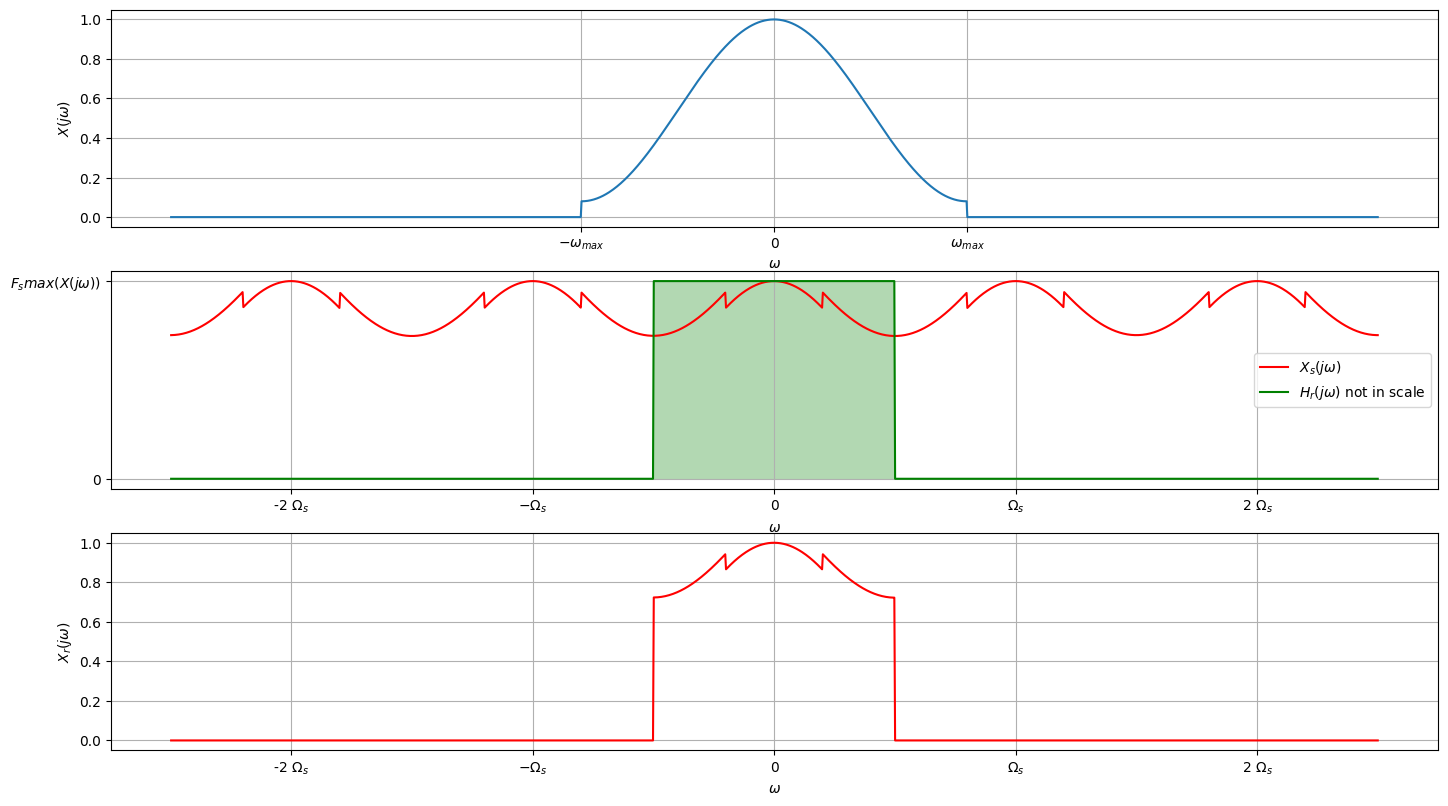

In [13]:
# >>>>>>>>>>>>>>>>> #reconstruction_spectrum_bad <<<<<<<<<<<<<<<<<<<<<<<<<
ommax = 0.8 * Oms
indices_add = np.argwhere((omgener > -ommax) & (omgener < ommax)).flatten()
HAM = np.hamming(indices_add.size)
X = np.zeros(omgener.shape)
X[indices_add] = HAM

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show])
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

XS = np.zeros(omgener.shape)
for where in multiples_Om_add * Oms:
    indices_add = np.argwhere((omgener > -ommax+where) & (omgener < ommax+where)).flatten()
    HAM = np.hamming(indices_add.size)
    XS[indices_add] = XS[indices_add] + HAM / Ts
HR = np.zeros(omgener.shape)
HR[(omgener > -Oms/2) & (omgener < +Oms/2)] = Ts

ax[1].plot(omshow, XS[indices_show],color='r',label='$X_s(j\omega)$')
ax[1].plot(omshow, HR[indices_show] / Ts ** 2,color='g',label='$H_r(j\omega)$ not in scale')
ax[1].fill([-Oms/2, Oms/2, Oms/2, -Oms/2],[0, 0, 1/Ts, 1/Ts],color='g',fill=True,linewidth =0,alpha=0.3)
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(where_in_omega)
ax[1].set_xticklabels(omegas_text)
ax[1].set_yticks([0,1/Ts])
ax[1].set_yticklabels(['0','$F_s max(X(j\omega))$'])
ax[1].legend()

XR = XS * HR
ax[2].plot(omshow, XR[indices_show],color='r')
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('$X_r(j\omega)$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].grid()


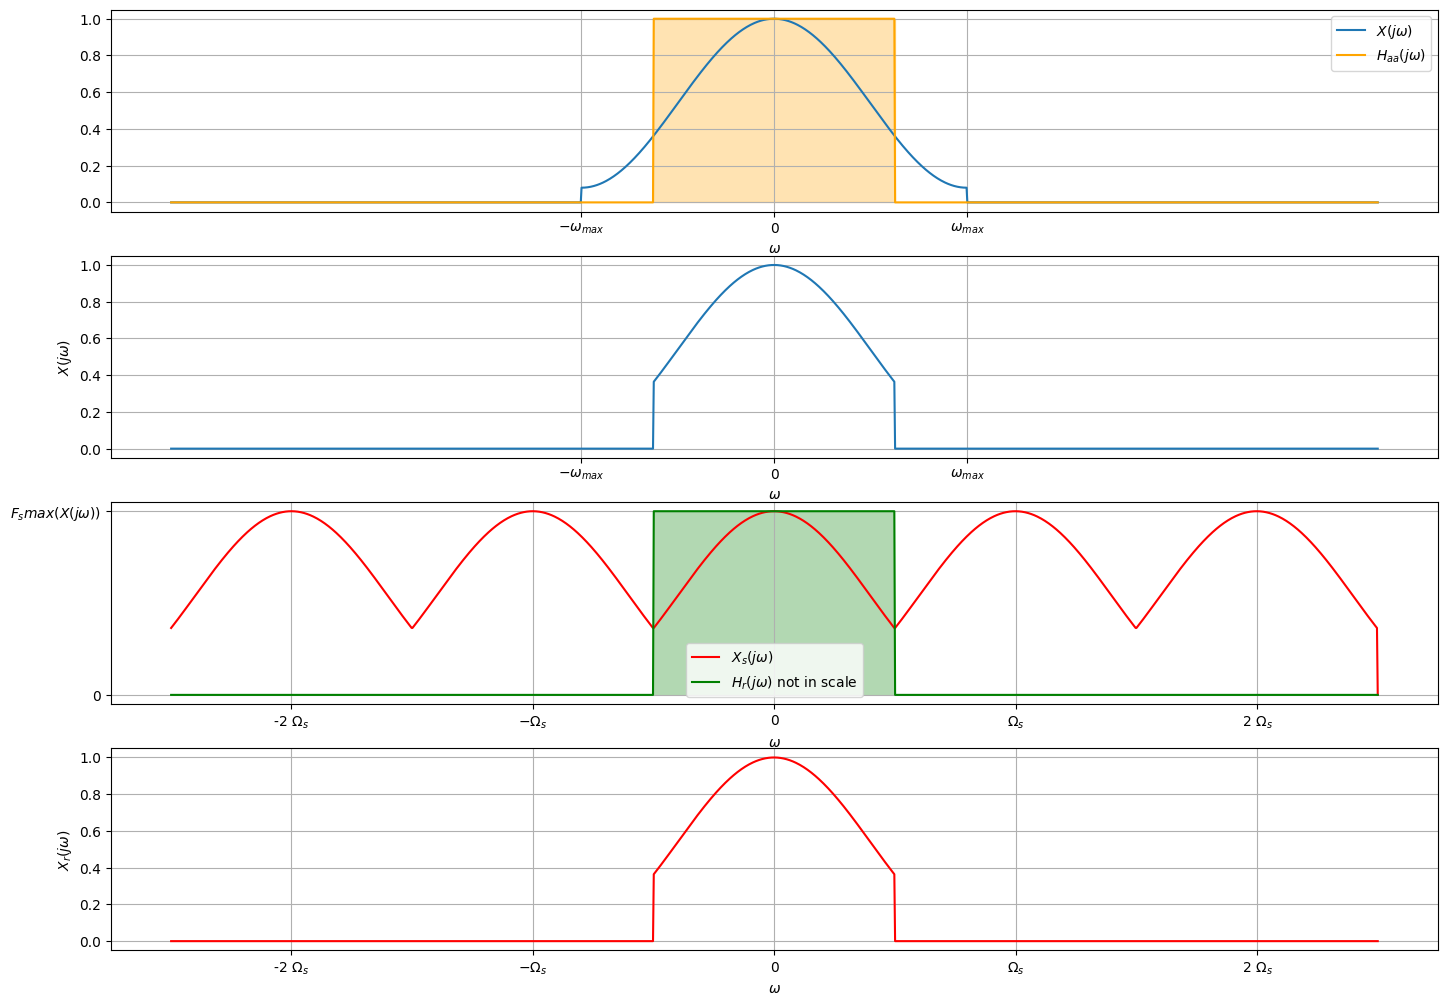

In [14]:
# >>>>>>>>>>>>>>>>> #anti-aliasing <<<<<<<<<<<<<<<<<<<<<<<<<
ommax = 0.8 * Oms
indices_add = np.argwhere((omgener > -ommax) & (omgener < ommax)).flatten()
HAM = np.hamming(indices_add.size)
X = np.zeros(omgener.shape)
X[indices_add] = HAM

fig, ax = plt.subplots(4,1,figsize=(14,10))
fig.tight_layout()
ax[0].plot(omshow, X[indices_show],label='$X(j\omega)$')
ax[0].grid()
ax[0].set_xticks([-ommax,0,ommax])
ax[0].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[0].set_xlabel('$\omega$')
ax[0].fill([-Oms/2, Oms/2, Oms/2, -Oms/2],[0, 0, 1, 1],color='orange',fill=True,linewidth =1,alpha=0.3)
ax[0].plot(omshow, HR[indices_show] / Ts ** 2,color='orange',label='$H_{aa}(j\omega)$')
ax[0].legend()

HAA = np.zeros(omgener.shape)
HAA[(omgener > -Oms/2) & (omgener < +Oms/2)] = Ts
XAA = X * HAA
ax[1].plot(omshow, XAA[indices_show])
ax[1].grid()
ax[1].set_xticks([-ommax,0,ommax])
ax[1].set_xticklabels(['$-\omega_{max}$','0','$\omega_{max}$'])
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$X(j\omega)$')

XS = np.zeros(omgener.shape)
XAA_add = XAA[(omgener > -Oms/2) & (omgener < Oms/2)]
for where in multiples_Om_add * Oms:
    indices_add = np.argwhere((omgener > -Oms/2+where) & (omgener < Oms/2+where)).flatten()
    indices_add = indices_add[:XAA_add.size]   # a dirty hack ...
    XS[indices_add] = XS[indices_add] + XAA_add / Ts
HR = np.zeros(omgener.shape)
HR[(omgener > -Oms/2) & (omgener < +Oms/2)] = Ts

ax[2].plot(omshow, XS[indices_show],color='r',label='$X_s(j\omega)$')
ax[2].plot(omshow, HR[indices_show] / Ts ** 2,color='g',label='$H_r(j\omega)$ not in scale')
ax[2].fill([-Oms/2, Oms/2, Oms/2, -Oms/2],[0, 0, 1/Ts, 1/Ts],color='g',fill=True,linewidth =0,alpha=0.3)
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_xticks(where_in_omega)
ax[2].set_xticklabels(omegas_text)
ax[2].set_yticks([0,1/Ts])
ax[2].set_yticklabels(['0','$F_s max(X(j\omega))$'])
ax[2].legend()

XR = XS * HR
ax[3].plot(omshow, XR[indices_show],color='r')
ax[3].set_xlabel('$\omega$')
ax[3].set_ylabel('$X_r(j\omega)$')
ax[3].set_xticks(where_in_omega)
ax[3].set_xticklabels(omegas_text)
ax[3].grid()

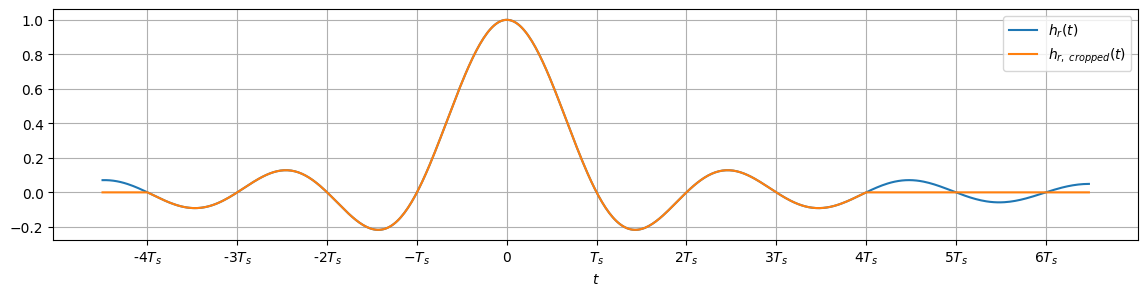

In [15]:
# >>>>>>>>>>>>>>>>> #cardinal_sine_time <<<<<<<<<<<<<<<<<<<<<<<<<
Ts = 1
Tmin=-4.5
Tmax=6.5
index_zero = 4
where_in_time = np.arange(-4,6+1)
DELTA = 1/50
t = np.arange(Tmin,Tmax,DELTA)
hr = np.sinc(Oms / 2 * t / np.pi)
hr_cropped = hr.copy()
hr_cropped[(t < -4*Ts)] = 0
hr_cropped[(t > 4*Ts)] = 0

plt.figure(figsize=(14,3))
plt.plot(t,hr,label='$h_r(t)$')
plt.plot(t,hr_cropped,label='$h_{r,~cropped}(t)$')
plt.gca().set_xlabel('$t$')
plt.gca().set_xticks(where_in_time)
plt.gca().set_xticklabels(time_text)
plt.gca().grid()
plt.gca().legend()


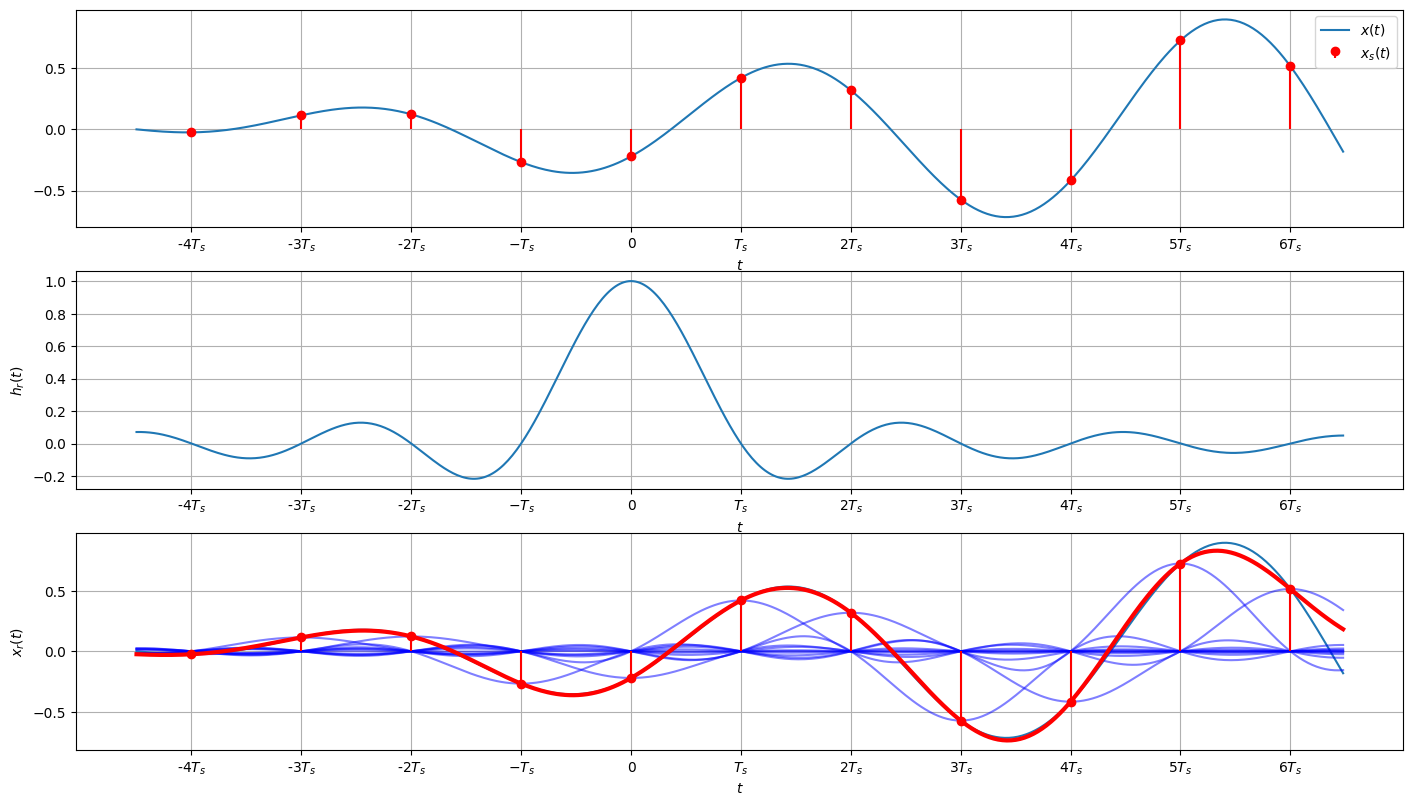

In [16]:
# >>>>>>>>>>>>>>>>> #reconstruction_time <<<<<<<<<<<<<<<<<<<<<<<<<

# some signal and sampling
x = -np.cos(1/2*np.pi * t + 1) * (t - Tmin) / (Tmax - Tmin)   # analog
xn = -np.cos(1/2*np.pi * where_in_time * Ts + 1) * (where_in_time * Ts - Tmin) / (Tmax - Tmin)  # sampled

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(t,x,label='$x(t)$')
ax[0].stem(where_in_time * Ts, xn,basefmt=" ",linefmt='r',markerfmt='ro',label='$x_s(t)$')
ax[0].set_xlabel('$t$')
ax[0].grid()
ax[0].legend()
ax[0].set_xticks(where_in_time)
ax[0].set_xticklabels(time_text)

# one reco signal
ax[1].plot(t,hr)
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h_r(t)$')
ax[1].grid()
ax[1].set_xticks(where_in_time)
ax[1].set_xticklabels(time_text)

# all of them + sum
ax[2].plot(t,x)
xr = np.zeros(t.size)
for ii,n in enumerate(where_in_time):
    this_hr = xn[ii] * np.sinc(Oms / 2 * (t - n*Ts) / np.pi)
    ax[2].plot(t,this_hr,alpha=0.5,color='b')
    xr = xr + this_hr
ax[2].plot(t,xr,color='r',linewidth=3)
ax[2].stem(where_in_time * Ts, xn,basefmt=" ",linefmt='r',markerfmt='ro')
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$x_r(t)$')
ax[2].set_xticks(where_in_time)
ax[2].set_xticklabels(time_text)
ax[2].grid()

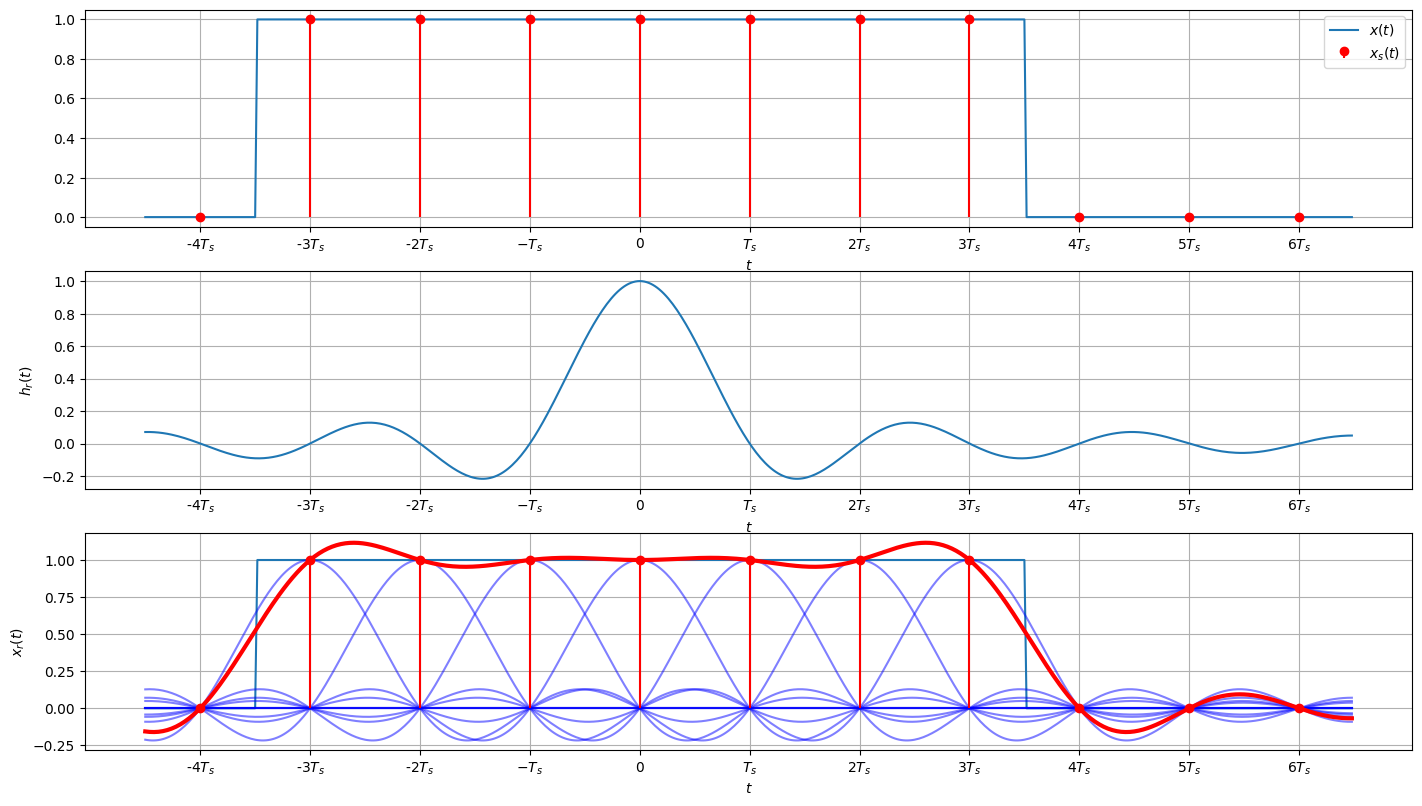

In [17]:
# >>>>>>>>>>>>>>>>> #reconstruction_time_bad <<<<<<<<<<<<<<<<<<<<<<<<<

# some signal and sampling
x = np.zeros(t.shape)
x[(t > -3.5) & (t < 3.5)] = 1
xn = np.zeros(where_in_time.shape)
xn[(where_in_time > -3.5) & (where_in_time < 3.5)] = 1

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(t,x,label='$x(t)$')
ax[0].stem(where_in_time * Ts, xn,basefmt=" ",linefmt='r',markerfmt='ro',label='$x_s(t)$')
ax[0].set_xlabel('$t$')
ax[0].grid()
ax[0].legend()
ax[0].set_xticks(where_in_time)
ax[0].set_xticklabels(time_text)

# one reco signal
ax[1].plot(t,hr)
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h_r(t)$')
ax[1].grid()
ax[1].set_xticks(where_in_time)
ax[1].set_xticklabels(time_text)

# all of them + sum
ax[2].plot(t,x)
xr = np.zeros(t.size)
for ii,n in enumerate(where_in_time):
    this_hr = xn[ii] * np.sinc(Oms / 2 * (t - n*Ts) / np.pi)
    ax[2].plot(t,this_hr,alpha=0.5,color='b')
    xr = xr + this_hr
ax[2].plot(t,xr,color='r',linewidth=3)
ax[2].stem(where_in_time * Ts, xn,basefmt=" ",linefmt='r',markerfmt='ro')
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$x_r(t)$')
ax[2].set_xticks(where_in_time)
ax[2].set_xticklabels(time_text)
ax[2].grid()